# Importación de librerías y lectura del data frame

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
df_secundario = pd.read_csv("/content/drive/MyDrive/secondary_data.csv", delimiter=';')

In [ ]:
df_secundario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
df_2["class"].loc[1] = "e"

<ipython-input-7-ead9be5d8ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["class"].loc[1] = "e"


In [ ]:
df_2

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,e,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
pd.DataFrame(df_secundario.stack())

0
0     class             p
      cap-diameter  15.26
      cap-shape         x
      cap-surface       g
      cap-color         o
...                   ...
61068 stem-color        y
      has-ring          f
      ring-type         f
      habitat           d
      season            u

[974986 rows x 1 columns]

In [ ]:
df_secundario["class"].loc[1] = "e"

<ipython-input-17-0425d746b2ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secundario["class"].loc[1] = "e"


In [ ]:
pd.merge(df_secundario, df_2, left_on = "class", right_on = "class")

In [ ]:
pd.DataFrame(df_secundario.unstack())

0
class  0      p
       1      p
       2      p
       3      p
       4      p
...          ..
season 61064  a
       61065  a
       61066  u
       61067  u
       61068  u

[1282449 rows x 1 columns]

In [ ]:
hola = df_secundario.groupby(["class"])

In [ ]:
hola.transform("count")

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
1,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
2,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
3,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
4,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
61065,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
61066,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888
61067,33888,33888,26475,33888,33888,27534,19768,33888,33888,33888,6001,14473,33888,2118,4236,33888,32829,4589,33888,33888


# Exporación de los datos

En esta sección se busca explorar todos los datos del Data Frame en donde se va tomar un criterio de decisión para la imputación de los Nans, en donde dicho criterio se utilizara en el resto de los ejercicios de la entrega.

In [ ]:
df_secundario.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df_secundario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

A continuación voy a ver que puede estar sucediendo con las features que tienen Nans. Para darme una idea de a que se deben los Nans, voy a utilizar la información original del data set, y en base a esto voy a tomar un criterio de decisión para imputarlos.

In [ ]:
df_secundario['cap-surface'].unique()

array(['g', 'h', nan, 't', 'y', 'e', 's', 'l', 'd', 'w', 'i', 'k'],
      dtype=object)

In [ ]:
df_secundario['gill-attachment'].unique()

array(['e', nan, 'a', 'd', 's', 'x', 'p', 'f'], dtype=object)

In [ ]:
df_secundario['gill-spacing'].unique()

array([nan, 'c', 'd', 'f'], dtype=object)

In [ ]:
df_secundario['stem-root'].unique()

array(['s', nan, 'b', 'r', 'c', 'f'], dtype=object)

In [ ]:
df_secundario['stem-surface'].unique()

array(['y', nan, 's', 'k', 'i', 'h', 't', 'g', 'f'], dtype=object)

In [ ]:
df_secundario['veil-type'].unique()

array(['u', nan], dtype=object)

In [ ]:
df_secundario['veil-color'].unique()

array(['w', 'y', nan, 'n', 'e', 'u', 'k'], dtype=object)

In [ ]:
df_secundario['ring-type'].unique()

array(['g', 'p', 'e', 'l', 'f', 'm', nan, 'r', 'z'], dtype=object)

In [ ]:
df_secundario['spore-print-color'].unique()

array([nan, 'w', 'p', 'k', 'r', 'u', 'n', 'g'], dtype=object)

Más abajo se muestra el criterio para imputar los Nans dependiendo de la feature. Un dato a tener en cuenta es que el autor utilizar el carácter 'f' para referirse a una característica faltante del hongo, y usa la 'o' para aquellas características que por alguna cuestión de implementación fue incluida en la categoría 'otro'.

* Cap-surface: Teniendo en cuenta que todos los hongos tienen una "gorra" y que en el data set, está la 'f',  voy a suponer que los Nans pertenecen a la clase 'o'.

* gill-attachment: Como hay hongos que no tienen branquias (clase 'f' en gill-color), en esta sección coinciden las 'f'; entonces los Nans los considero de la clase 'o'.

* gill-spacing: Sucede los mismo que el caso anterior; entonces los Nans son de la clase 'o'.

* stem-root: En la información del data set aparecen clases faltantes en este data set, que son 'z', 'e' y 'u'. A su vez, aparece una clase no especificada llamada 'f'. Para este caso voy a suponer que 'f' quiere decir que no tiene "raíz", y que los Nans se distribuyen en alguna de las otras tres clases como 'o'.

* stem-surface: Como nos estamos refiriendo a la superficie del tallo, los Nans van a pertenecer a la clase 'o'.

* veil-type: Esta clase la tuve que comparar con "veil-color", en donde según la información del data set, hay dos tipos de velo: 'u' y 'p', pero la segunda clase no figura. Como en “vail-color” para algunas filas hay colores asignados cuando en "veil-type" hay un Nan, voy a suponer que en esos casos hay una 'p' asignada. En los demás casos voy a suponer que el hongo no tiene velo, entonces no hay color y en ambas clases va 'f'.

* veil-color: Use el mismo criterio que "veil-type".

* ring-type: Como en las 'f' de esta categoría y "has-ring" coinciden, los Nan va a 'o'.

* spore-print-color: Tengo entendido que todos los hongos tienen esporas, entonces los Nans los reemplazo por la clase 'o'.


In [ ]:
# Imputa los Nans dados un data frame, el nombre de la features y un caracter.
def imputar_nans(df, nombre_feature, caracter):

  df[nombre_feature] = df[nombre_feature].fillna(caracter)


In [ ]:
#Esta linea es para agregar la p en ciertos hongos en "veil-type".
serie_velos = df_secundario[(df_secundario['veil-type'].isna() == True) & (df_secundario['veil-color'].isna() == False)]['veil-type']
indices_sv = serie_velos.index.values
for i in indices_sv:
  df_secundario['veil-type'].loc[i] = 'p'

<ipython-input-15-c20033db68ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secundario['veil-type'].loc[i] = 'p'


In [ ]:
#Esta linea es para reemplazar la 'd' por 'o' ya que no esta escificada en la inforamcion del data set.
df_secundario['cap-surface'] = df_secundario["cap-surface"].map(lambda x: 'o' if x == 'd' else x)

In [ ]:
imputar_nans(df_secundario, 'cap-surface', 'o')
imputar_nans(df_secundario, 'gill-attachment', 'o')
imputar_nans(df_secundario, 'gill-spacing', 'o')
imputar_nans(df_secundario, 'stem-root', 'o')
imputar_nans(df_secundario, 'stem-surface', 'o')
imputar_nans(df_secundario, 'veil-color', 'f')
imputar_nans(df_secundario, 'veil-type', 'f')
imputar_nans(df_secundario, 'ring-type', 'o')
imputar_nans(df_secundario, 'spore-print-color', 'o')

# Preparación de los datos

En esta sección se preparan los datos para realizar una Regresión Logística. Cabe aclarar que por el enunciado del ejercicio, si o si se van a utilizar todas las columnas del data set ya que, más allá de que hay features en donde en su mayoría hay Nans, no puedo descartarlas por los criterios dichos anteriormente; y así mismo, considero que podría utilizar todas las features en este ejercicio.

Separo el target del resto del data frame.

In [ ]:
X = df_secundario.drop('class', axis=1)

In [ ]:
y = df_secundario['class']

Creo un set de entrenamiento y uno de medición.

In [ ]:
X_train, X_med, y_train, y_med = train_test_split(X, y, test_size=0.2, random_state=13)

Creo un set de testeo y uno de validación a partir del de medición. Con respecto a al set de entrenamineto y de validación, conviene que el primero tenga muchos mas datos(en este caso el 80%) que el segundo.

In [ ]:
X_test, X_validation, y_test, y_validation = train_test_split(X_med, y_med, test_size=0.5, random_state=13)

Voy a utilizar una variable binaria {0, 1} para representar al target ("class") en donde 1 es para indicar que el hongo es venenoso ('p') y 0 si el hongo es comestible ('e').

In [ ]:
y_train =  y_train.map(lambda x: 1 if x == 'p' else 0)

In [ ]:
y_validation =  y_validation.map(lambda x: 1 if x == 'p' else 0)

In [ ]:
y_test =  y_test.map(lambda x: 1 if x == 'p' else 0)

Aplico un encoding a todas las columnas. En este caso, al no tener una gran cantidad de columnas por cada clase, voy a utilizar OHE para todas las features categóricas.

In [ ]:
#Aplica OHE a cada columna de X_train, X_test y X_validation dado una feature y su nombre.
def aplicar_ohe(nombre_feature, columnas):

  global X_train, X_test, X_validation
  ohe = OneHotEncoder()
  encoded_train = ohe.fit_transform(X_train[[nombre_feature]]).todense().astype(int)
  encoded_test = ohe.fit_transform(X_test[[nombre_feature]]).todense().astype(int)
  encoded_validation = ohe.transform(X_validation[[nombre_feature]]).todense().astype(int)
  X_train = X_train.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_train))
  X_test = X_test.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_test))
  X_validation = X_validation.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_validation))
  X_train = X_train.rename(columns=columnas)
  X_test = X_test.rename(columns=columnas)
  X_validation = X_validation.rename(columns=columnas)

Con "cap-shape":

In [ ]:
aplicar_ohe('cap-shape', {0:'b0',1:'c0',2:'f0',3:'o0',4:'p0',5:'s0',6:'x0'})

Con "cap-surface":

In [ ]:
aplicar_ohe('cap-surface', {0:'e1',1:'g1',2:'h1',3:'i1',4:'k1',5:'l1',6:'o1',7:'s1',8:'t1',9:'w1',10:'y1'})

Con "cap-color":

In [ ]:
aplicar_ohe('cap-color', {0:'b2',1:'e2',2:'g2',3:'k2',4:'l2',5:'n2',6:'o2', 7:'p2', 8:'r2', 9:'u2', 10:'w2', 11:'y2'})

Con "does-bruise-or-bleed":

In [ ]:
aplicar_ohe('does-bruise-or-bleed', {0:'f3',1:'t3'})

Con "gill-attachment":

In [ ]:
aplicar_ohe('gill-attachment', {0:'a4',1:'d4',2:'e4',3:'f4',4:'o4',5:'p4',6:'s4', 7:'x4'})

Con "gill-spacing":

In [ ]:
aplicar_ohe('gill-spacing', {0:'c5',1:'d5',2:'f5',3:'o5'})

Con "gill-color":

In [ ]:
aplicar_ohe('gill-color', {0:'b6',1:'e6',2:'f6',3:'g6',4:'k6',5:'n6',6:'o6', 7:'p6', 8:'r6', 9:'u6', 10:'w6', 11:'y6'})

Con "stem-root":

In [ ]:
aplicar_ohe('stem-root', {0:'b7',1:'c7',2:'f7',3:'o7',4:'r7',5:'s7'})

Con "stem-surface":

In [ ]:
aplicar_ohe('stem-surface', {0:'f8',1:'g8',2:'h8',3:'i8',4:'k8',5:'o8',6:'s8', 7:'t8',8:'y8'})

Con "stem-color":

In [ ]:
aplicar_ohe('stem-color', {0:'b9',1:'e9',2:'f9',3:'g9',4:'k9',5:'l9',6:'n9', 7:'o9', 8:'p9', 9:'r9', 10:'u9', 11:'w9', 12:'y9'})

Con "veil-type":

In [ ]:
aplicar_ohe('veil-type', {0:'f10',1:'p10',2:'u10'})

Con "veil-color":

In [ ]:
aplicar_ohe('veil-color', {0:'e11',1:'h11',2:'n11',3:'o11',4:'u11',5:'w11',6:'y11'})

Con "has-ring":

In [ ]:
aplicar_ohe('has-ring', {0:'f12',1:'t12'})

Con "ring-type":

In [ ]:
aplicar_ohe('ring-type', {0:'e13',1:'f13',2:'g13',3:'l13',4:'m13',5:'o13',6:'p13', 7:'r13', 8:'z13'})

Con "spore-print-color":

In [ ]:
aplicar_ohe('spore-print-color', {0:'g14',1:'k14',2:'n14',3:'o14',4:'p14',5:'r14',6:'u14', 7:'w14'})

Con "habitat":

In [ ]:
aplicar_ohe('habitat', {0:'d15',1:'g15',2:'h15',3:'l15',4:'m15',5:'p15',6:'u15', 7:'w15'})

Con "season":

In [ ]:
aplicar_ohe('season', {0:'a16',1:'s16',2:'u16',3:'w16'})

Aclaración: Ya sé que los nombres no son los ideales para las columnas, la idea es que pueda aplicar OHE para poder realizar el entrenamiento y se pueda reconocer a que feature pertenece cada categoría; también por esta razón no utilice un ciclo for para encodear todas las features al mismo tiempo y preferí separarlas por nombre.

In [ ]:
X_train

,cap-diameter,stem-height,stem-width,b0,c0,f0,o0,p0,s0,x0,...,h15,l15,m15,p15,u15,w15,a16,s16,u16,w16
0,15.74,5.02,28.73,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.27,3.79,5.63,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12.05,6.03,23.98,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.08,6.04,14.95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,6.44,12.23,12.77,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,8.53,3.63,25.28,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48851,10.66,5.10,19.52,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48852,1.62,3.73,2.63,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
48853,1.29,5.00,2.45,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_validation

,cap-diameter,stem-height,stem-width,b0,c0,f0,o0,p0,s0,x0,...,h15,l15,m15,p15,u15,w15,a16,s16,u16,w16
0,2.38,8.13,2.59,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2.35,5.48,2.31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.70,14.78,18.18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5.64,6.76,12.15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.69,7.84,14.56,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,10.65,10.00,22.49,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6103,5.20,12.43,13.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6104,8.51,4.52,13.00,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6105,9.27,11.46,32.54,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test

,cap-diameter,stem-height,stem-width,b0,c0,f0,o0,p0,s0,x0,...,h15,l15,m15,p15,u15,w15,a16,s16,u16,w16
0,7.81,6.27,18.18,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,10.96,3.89,26.20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.27,11.77,18.76,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,7.93,7.56,13.68,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,9.96,8.33,15.72,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,13.53,6.19,16.40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6103,3.55,4.84,6.47,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6104,4.16,5.16,10.51,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6105,4.51,6.44,9.02,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Entrenamiento y validación del modelo

En esta sección se encuentra el entrenamiento y búsqueda de híper parámetros del modelo mediante los set de entrenamiento y validación.

Entreno una Regresión Logística.

In [ ]:
log_reg = LogisticRegression(random_state = 13, max_iter=2000)

params = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none']},
    {'C': [0.001, 0.01,0.1,1 ,10, 100]},
]

rs = RandomizedSearchCV(log_reg, param_distributions=params, n_iter=10, random_state=13, scoring='roc_auc')

In [ ]:
rs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

RandomizedSearchCV(estimator=LogisticRegression(max_iter=2000, random_state=13),
                   param_distributions=[{'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
                   random_state=13, scoring='roc_auc')

In [ ]:
rs.best_params_

{'penalty': 'none'}

In [ ]:
model = rs.best_estimator_

Entreno el modelo con los mejores parámetros encontrados.

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=2000, penalty='none', random_state=13)

Utilizo el set de validación para la búsqueda de los híper parámetros.

In [ ]:
y_pred_validation = model.predict(X_validation)

In [ ]:
y_pred_validation

array([1, 1, 1, ..., 0, 0, 0])

Realizo una matriz de confusión para el set de validación.

In [ ]:
matriz_confusion_validation = confusion_matrix(y_validation, y_pred_validation)

In [ ]:
matriz_confusion_validation

array([[2320,  403],
       [ 420, 2964]])

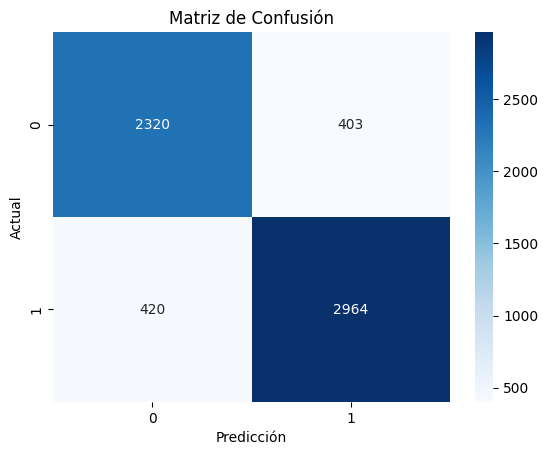

In [ ]:
sns.heatmap(matriz_confusion_validation, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

Doy las mediciones del set de validación.


In [ ]:
roc_auc = roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])
print("ROC AUC SCORE:", roc_auc)

ROC AUC SCORE: 0.9385660762144381


In [ ]:
accuracy = accuracy_score(y_validation, y_pred_validation)
print("ACCURACY SCORE:", accuracy)

ACCURACY SCORE: 0.8652366137219584


# Pruebas realizadas

En esta sección están las pruebas realizados con el set de validación en busca de los híper parámetros. Cabe aclarar que al ser un modelo más simple que los otros, no se profundizo demasiado en esta sección.


Pruebas:
* Prueba 1: Con "C" = 10 y todos los demás parámetros por defecto sin convergencia del modelo:
ROC AUC SCORE: 0.9312605213100209, ACCURACY SCORE: 0.8550843294579991, Matriz de confusión:([[2302,421],[ 464,2920]]).

* Prueba 2: Con "penalty" = "none", "max iter" = 500 y todos los demás parámetros por defecto sin convergencia del modelo:
ROC AUC SCORE: 0.9385575028932247, ACCURACY SCORE: 0.8634354019977075, Matriz de confusión:([[2314,409],[ 425,2959]]).

* Prueba 3: Con "C" = 100, max iter = 1000 y todos los demás parámetros por defeco sin convergencia del modelo:
ROC AUC SCORE: 0.9385584796007046, ACCURACY SCORE: 0.8652366137219584, Matriz de confusión:([[2320,403],[ 420,2964]]).

* Prueba 4: Con "penality" = "none", "max iter" = 2000 y todos los demás parámetros por defeco con convergencia del modelo:
ROC AUC SCORE: 0.9385660762144381, ACCURACY SCORE: 0.8652366137219584, Matriz de confusión:([[2320,403],[420,2964]]).

Como puede verse, con respecto al set de validación, el mejor Roc Auc Score para las pruebas realizadas es de
0.9385660762144381, el cual, es la métrica utilizada en este informe para evaluar la eficacia del metodo utilizado.
Para este modelo,  la diferencia de las métricas obtenidas durante todas las pruebas, resulta ser  mínima; en donde el modelo no se pensó para ser perfecto, sino que sea un modelo simple y que cumpla con lo pedido por la consigna.


# Testeo del modelo con el set de testeo

La idea de esta seccion es ver algunas metricas del modelo final.


In [ ]:
y_pred_test = model.predict(X_test)

Realizo una matriz de confusión para el set de testeo.

In [ ]:
matriz_confusion_test = confusion_matrix(y_test, y_pred_test)

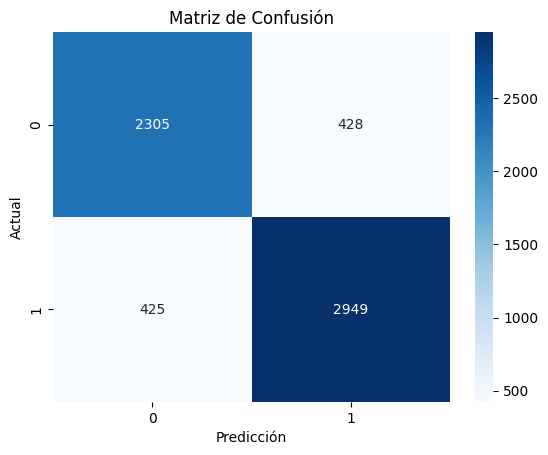

In [ ]:
sns.heatmap(matriz_confusion_test, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

Doy las métricas del set de testeo.

In [ ]:
roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC SCORE:", roc_auc_test)

ROC AUC SCORE: 0.9387020609811669


In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
print("ACCURACY SCORE:", accuracy)

ACCURACY SCORE: 0.8603242181103652


En este caso el score obtenido es muy similar al de validación, el cual, en  ROC AUC SCORE, da 0. 9387020609811669. A continuación doy un archivo.csv con las predicciones.

In [ ]:
df_test = pd.DataFrame(y_test)

In [ ]:
df_test.columns = ['Actual']

In [ ]:
df_test["Prediccion"] = y_pred_test

In [ ]:
df_test

,Actual,Prediccion
22594,1,1
60018,1,1
38408,1,1
43407,1,1
52538,0,0
...,...,...
53557,1,1
35871,1,1
51464,0,0
37312,1,1


In [ ]:
df_test.to_csv('test.csv')

El archivo.csv aparecerá para descargarse en la notebook.

# Importancia de las Features

En esta sección se encuentra la importancia de las features de la Regresión Logística.

In [ ]:
# Suma todas las importancias de las features dado un data frame de importancias individuales, uno con las importancias
# sumadas, las features individuales y la feature a la que pertenecen.
def sumar_importancias(df_importancias, df_importancias_sumadas, features_individuales, feature):

  suma_importancias = 0

  for i in features_individuales:
    suma_importancias += df_importancias[i].sum()
  df_importancias_sumadas[feature] = suma_importancias

In [ ]:
importancias_individuales = pd.DataFrame(np.abs(model.coef_[0])).T
importancias_individuales.columns = X_train.columns
importancias_sumadas = pd.DataFrame()
importancias_sumadas['cap-diameter'] = importancias_individuales['cap-diameter']
importancias_sumadas['stem-height'] = importancias_individuales['stem-height']
importancias_sumadas['stem-width'] = importancias_individuales['stem-width']
sumar_importancias(importancias_individuales, importancias_sumadas, ['b0','c0','f0','o0','p0','s0','x0'], 'cap-shape')
sumar_importancias(importancias_individuales, importancias_sumadas, ['e1','g1','h1','i1','k1','l1','o1','s1','t1','w1','y1'], 'cap-surface')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b2','e2','g2','k2','l2','n2','o2','p2','r2','u2','w2','y2'], 'cap-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['f3', 't3'], 'does-bruise-or-bleed')
sumar_importancias(importancias_individuales, importancias_sumadas, ['a4','d4','e4','f4','o4','p4','s4','x4'], 'gill-attachment')
sumar_importancias(importancias_individuales, importancias_sumadas, ['c5','d5','f5','o5'], 'gill-spacing')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b6','e6','f6','g6','k6','n6','o6', 'p6','r6','u6','w6','y6'], 'gill-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b7','c7','f7','o7','r7','s7'], 'stem-root')
sumar_importancias(importancias_individuales, importancias_sumadas, ['f8','g8','h8','i8','k8','o8','s8','t8','y8'], 'stem-surface')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b9','e9','f9','g9','k9','l9','n9','o9','p9','r9','u9','w9','y9'], 'stem-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['f10','p10','u10'], 'veil-type')
sumar_importancias(importancias_individuales, importancias_sumadas, ['e11','h11','n11','o11','u11','w11','y11'], 'veil-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['f12','t12'], 'has-ring')
sumar_importancias(importancias_individuales, importancias_sumadas, ['e13','f13','g13','l13','m13','o13','p13','r13','z13'], 'ring-type')
sumar_importancias(importancias_individuales, importancias_sumadas, ['g14','k14','n14','o14','p14','r14','u14','w14'], 'spore-print-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['d15','g15','h15','l15','m15','p15','u15','w15'], 'habitat')
sumar_importancias(importancias_individuales, importancias_sumadas, ['a16','s16','u16','w16'], 'season')
importancias_sumadas = importancias_sumadas.T.rename(columns={0:"Importancia"})

In [ ]:
importancias_sumadas

,Importancia
cap-diameter,0.046432
stem-height,0.116543
stem-width,0.023430
cap-shape,8.952411
cap-surface,12.303319
cap-color,13.586107
does-bruise-or-bleed,6.865965
gill-attachment,15.139951
gill-spacing,6.865965
gill-color,8.870241


Text(0, 0.5, 'Feature')

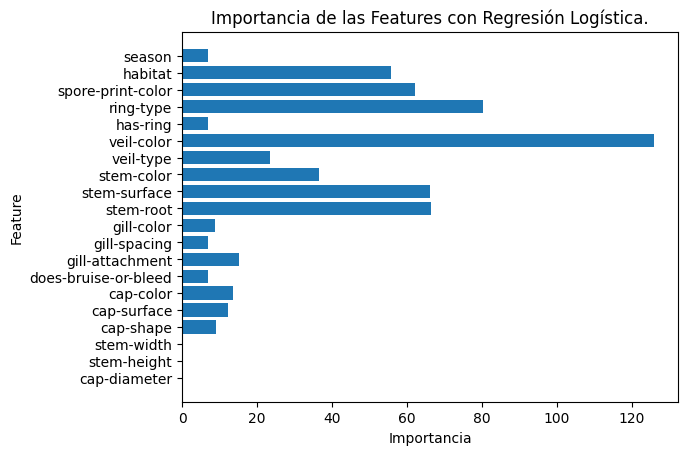

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Regresión Logística.")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Como puede verse en el gráfico, claramente para este modelo las features numéricas "cap-diameter", "stem-height" y "stem-width" no aportan prácticamente nada al modelo. Después en líneas generales, la mayoría de las features aportan poco al modelo, a excepción de "veil-color" (la que más aporta y con diferencia), "habitat", "spore-print-color", "stem-root" y "stem-surface". Cabe destacar, que estas importancias podrían variar significativamente si se utilizasen distintos híper parámetros a los obtenidos en la última prueba realizada.